In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Define the dataset

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  
y = np.array([[0], [1], [1], [0]])  

## Initialize the parameters


In [3]:
input_size = 2  
hidden_size = 4  
output_size = 1 

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

## Define the activation function


In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## Feed Forward

In [5]:
def forward_propagation(X):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    
    return a1, a2

## Backward propagation


In [6]:
def backward_propagation(X, y_true, a1, a2):
    dz2 = a2 - y_true
    dW2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)
    

    dz1 = np.dot(dz2, W2.T) * sigmoid_derivative(a1)
    dW1 = np.dot(X.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)
    
    return dW1, db1, dW2, db2

## Update parameters


In [7]:
def compute_loss(y_pred, y_true):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def sigmoid_derivative(x):
    return x * (1 - x)

## Train the neural network

In [8]:
learning_rate = 0.0001
epochs = 10000

for epoch in range(epochs):
    a1, y_pred = forward_propagation(X)

    loss = compute_loss(y_pred, y)
    
    dW1, db1, dW2, db2 = backward_propagation(X, y, a1, y_pred)
    
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1 
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: Loss = {loss}")

predictions = forward_propagation(X)[1]
predictions = (predictions > 0.5).astype(int)
print("Predictions:", predictions)

Epoch 0: Loss = 0.704615848181712
Epoch 1000: Loss = 0.7007627739991712
Epoch 2000: Loss = 0.6983449317192422
Epoch 3000: Loss = 0.6968257133042483
Epoch 4000: Loss = 0.69586751587431
Epoch 5000: Loss = 0.6952590028015772
Epoch 6000: Loss = 0.6948682773492936
Epoch 7000: Loss = 0.6946131685426455
Epoch 8000: Loss = 0.6944425370544501
Epoch 9000: Loss = 0.6943245742579512
Predictions: [[0]
 [0]
 [1]
 [1]]


## relation between learning rate and loss

In [9]:
learning_rates = [0.01, 0.05, 0.1, 0.5, 1.0]
epochs = 10000

losses = []

for learning_rate in learning_rates:
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))
    
    loss_history = []
    
    for epoch in range(epochs):
        a1, y_pred = forward_propagation(X)
        
        loss = compute_loss(y_pred, y)
        loss_history.append(loss)
        
        dW1, db1, dW2, db2 = backward_propagation(X, y, a1, y_pred)
        
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
    
    losses.append(loss_history)

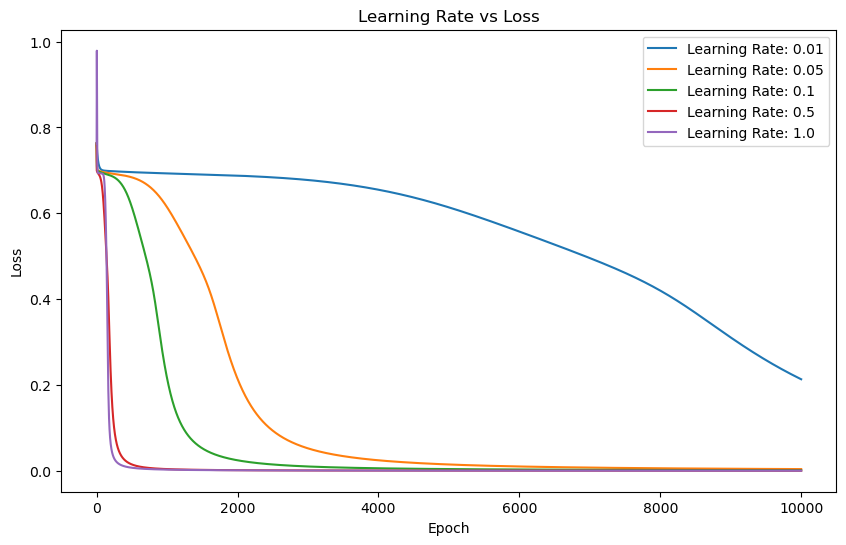

In [10]:
plt.figure(figsize=(10, 6))
for i in range(len(learning_rates)):
    plt.plot(losses[i], label=f"Learning Rate: {learning_rates[i]}")
plt.title("Learning Rate vs Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()